In [3]:
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [2]:
# pre built model with pre-trained weights on imagenet
model = VGG16(weights='imagenet', include_top=True)
model.compile(optimizer='sgd', loss='categorical_crossentropy')

2023-08-13 13:13:01.215324: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2023-08-13 13:13:01.717123: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 411041792 exceeds 10% of free system memory.
2023-08-13 13:13:01.967480: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 411041792 exceeds 10% of free system memory.
2023-08-13 13:13:02.024499: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 411041792 exceeds 10% of free system memory.


553467096/553467096 [==============================] - 595s 1us/step


2023-08-13 13:23:01.013044: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 411041792 exceeds 10% of free system memory.


In [4]:
# resize into VGG16 trained images' format
im = cv2.resize(cv2.imread('cat-standing.jpg'), (224, 224))
im = np.expand_dims(im, axis=0)

In [5]:
# predict
out = model.predict(im)
index = np.argmax(out)
print(index)

1/1 [==============================] - 1s 592ms/step
281


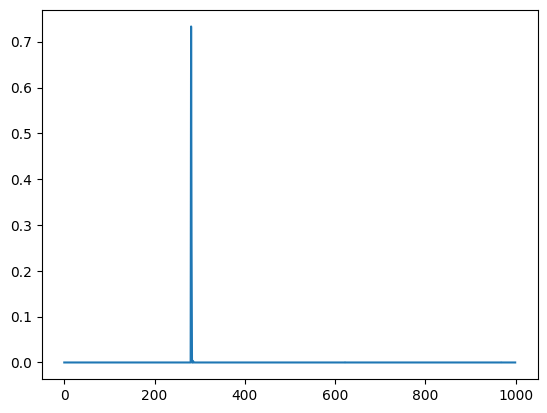

In [6]:
plt.plot(out.ravel())
plt.show()

# Recycling pre-built deep learning models for extracting features

In [8]:
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import models
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np
import cv2

In [9]:
# prebuild model with pre-trained weights on imagenet
base_model = model
print(base_model)

In [10]:
for i, layer in enumerate(base_model.layers):
    print(i, layer.name, layer.output_shape)

0 input_1 [(None, 224, 224, 3)]
1 block1_conv1 (None, 224, 224, 64)
2 block1_conv2 (None, 224, 224, 64)
3 block1_pool (None, 112, 112, 64)
4 block2_conv1 (None, 112, 112, 128)
5 block2_conv2 (None, 112, 112, 128)
6 block2_pool (None, 56, 56, 128)
7 block3_conv1 (None, 56, 56, 256)
8 block3_conv2 (None, 56, 56, 256)
9 block3_conv3 (None, 56, 56, 256)
10 block3_pool (None, 28, 28, 256)
11 block4_conv1 (None, 28, 28, 512)
12 block4_conv2 (None, 28, 28, 512)
13 block4_conv3 (None, 28, 28, 512)
14 block4_pool (None, 14, 14, 512)
15 block5_conv1 (None, 14, 14, 512)
16 block5_conv2 (None, 14, 14, 512)
17 block5_conv3 (None, 14, 14, 512)
18 block5_pool (None, 7, 7, 512)
19 flatten (None, 25088)
20 fc1 (None, 4096)
21 fc2 (None, 4096)
22 predictions (None, 1000)


In [12]:
base_model.get_layer('block4_pool').output

<KerasTensor: shape=(None, 14, 14, 512) dtype=float32 (created by layer 'block4_pool')>

In [13]:
# extract features from block4_pool block
model = models.Model(inputs=base_model.input,
                     outputs=base_model.get_layer('block4_pool').output)

In [14]:
img_path = 'cat-standing.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [17]:
# get the features from this block
features = model.predict(x)
print(features)

1/1 [==============================] - 0s 212ms/step
[[[[   0.           0.         227.73962   ...   22.83277
       0.           0.       ]
   [   0.           0.         518.2039    ...  104.24848
       0.           0.       ]
   [  24.324852     0.         669.59296   ...   33.276257
       0.           0.       ]
   ...
   [   0.           0.          98.140625  ...    0.
     447.02902      0.       ]
   [   0.           0.         545.6184    ...    0.
     716.5399       0.       ]
   [  37.317387     0.         180.43294   ...   38.459335
       0.           0.       ]]

  [[   0.           0.           0.        ...    0.
       0.           0.       ]
   [   0.           0.          71.31129   ...   96.03883
       0.           0.       ]
   [   0.           0.         271.78662   ...    0.
       0.           0.       ]
   ...
   [   0.           0.           0.        ...    0.
     509.8687       0.       ]
   [   0.           0.         346.62167   ...    0.
    1022.94

In [18]:
features.shape

(1, 14, 14, 512)

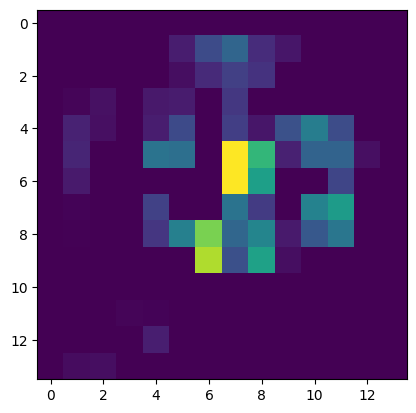

In [26]:
plt.imshow(features[0, :, :, 511])